# Imports

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt

import pickle

import tkinter as tk
from PIL import ImageTk,Image,ImageDraw
import cv2

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')


# load the model from disk


In [2]:
filename = 'clf.sav'
output_path='./output/'
clf = pickle.load(open(output_path+filename, 'rb'))
print('mission done!')

mission done!


# Design a GUI using tkinter

Path Already Exists


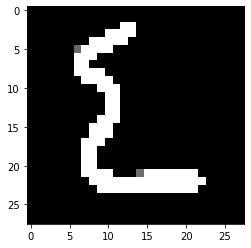

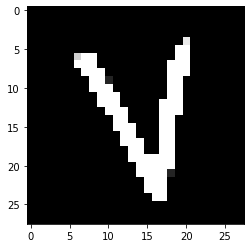

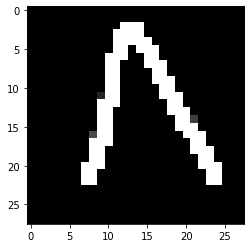

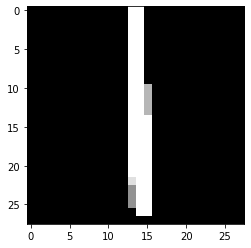

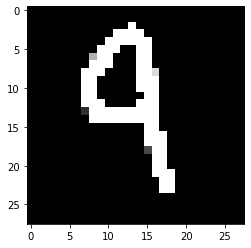

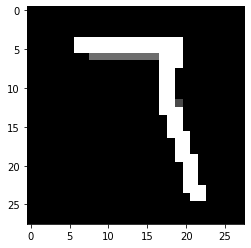

In [3]:
try:
    os.mkdir('./output/test_Data')
except:
    print('Path Already Exists')

width,height=500,500

win=tk.Tk()

font_btn='Helvetica 20 bold'
font_label='Helvetica 24 bold'
count=0



def event_function(event):

    x=event.x       #x coordinate of mouse pointer
    y=event.y       #y coordinate of mouse pointer

    x1=x-20
    y1=y-20

    x2=x+20
    y2=y+20
    
    canvas.create_oval((x1,y1,x2,y2),fill='black')
    img_draw.ellipse((x1,y1,x2,y2),fill='white')

def save():

    global count
    
    img_array=np.array(img)
    img_array=cv2.resize(img_array,(28,28))

    path=os.path.join('./output/test_Data',str(count)+'.jpg')
    
    cv2.imwrite(path,img_array)

    count=count+1

def clear():

    global img,img_draw

    canvas.delete('all')
    img=Image.new('RGB',(width,height),(0,0,0))
    img_draw=ImageDraw.Draw(img)
    label_status.config(text='PREDICTED DIGIT: NONE')

def predict():
    global img

    img_array=np.array(img) #converting to numpy array
    img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY) #converting into a gray image
    img_array1=cv2.resize(img_array.T,(28,28)) #resizing into 28x28    # T to be compatible with the train data

    img_array=np.reshape(img_array1,(1,784))  
    img_array=img_array/255.0

    result=clf.predict(img_array)

    label_status.config(text='PREDICTED DIGIT:'+str(result))
    plt.imshow(img_array1.T, cmap='gray',)
    plt.show()
    
canvas=tk.Canvas(win,width=width,height=height,bg='white')
canvas.grid(row=0,column=0,columnspan=4)

canvas.bind('<B1-Motion>',event_function)
img=Image.new('RGB',(width,height),(0,0,0))
img_draw=ImageDraw.Draw(img)

button_save=tk.Button(win,text='SAVE',bg='green',fg='white',font=font_btn,command=save)
button_save.grid(row=1,column=0)

button_predict=tk.Button(win,text='PREDICT',bg='blue',fg='white',font=font_btn,command=predict)
button_predict.grid(row=1,column=1)

button_clear=tk.Button(win,text='CLEAR',bg='yellow',fg='white',font=font_btn,command=clear)
button_clear.grid(row=1,column=2)

button_exit=tk.Button(win,text='EXIT',bg='red',fg='white',font=font_btn,command=win.destroy)
button_exit.grid(row=1,column=3)

label_status=tk.Label(win,text='PREDICTED DIGIT: NONE',bg='white',font=font_label)
label_status.grid(row=2,column=0,columnspan=4)


win.mainloop()

# Refrences 

Thanks to @aieml in:    https://github.com/aieml/APDY-Tutorial-04/blob/dd74b88646127b473f1fe5fa14c7ba6c92d6779c/2.0%20GUI%20Handwritten%20Digits.ipynb